In [20]:
 from sklearn.svm import SVC
 from sklearn.tree import DecisionTreeClassifier, plot_tree
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 from pandas import read_csv
 import numpy as np
 import matplotlib.pyplot as plt
 from matplotlib.colors import ListedColormap


         x0        x1  y
0 -0.535681 -0.847708  0
1 -0.118459 -0.521193  1
2  0.057732  0.457211  1
3 -0.170786 -0.378762  1
4  0.291529  1.000946  0
(300, 3)
Number of samples: 300
Number of features: 2


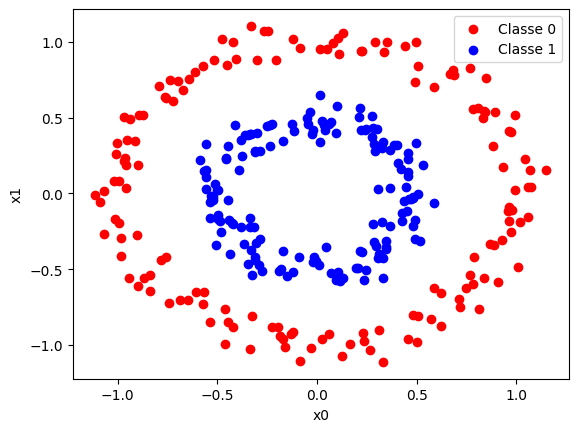

In [21]:
data = read_csv("SVM_example2.csv")
print(data.head())
print(data.shape)
X = data.iloc[:, :-1]      # all columns except last
y = data.iloc[:, -1]       # last column is target

# Print results
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
plt.scatter(X[y==0]["x0"], X[y==0]["x1"], color='red', label='Classe 0')
plt.scatter(X[y==1]["x0"], X[y==1]["x1"], color='blue', label='Classe 1')

plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()


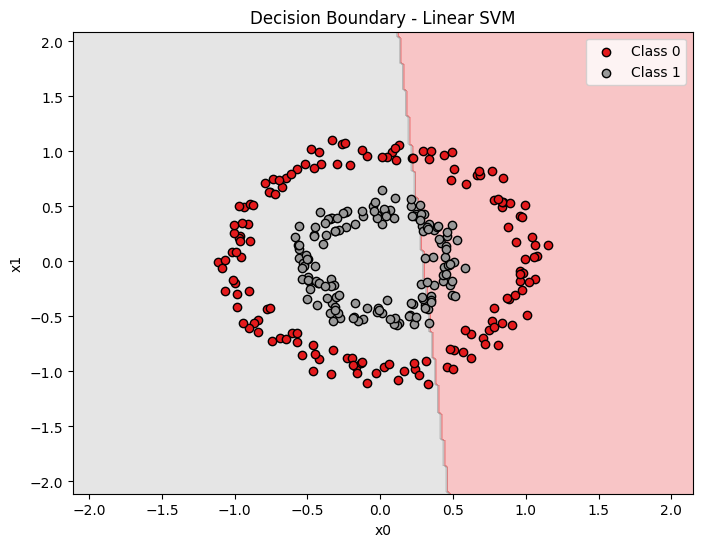

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from pandas import read_csv

# Charger le dataset
data = read_csv("SVM_example2.csv")
X = data[["x0", "x1"]].values  # on prend les deux features
y = data["y"].values           # target

# Entraîner un SVM linéaire
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X, y)

# Fonction pour tracer la frontière
def plot_decision_boundary(X, y, model, resolution=0.02):
    if X.shape[1] != 2:
        raise ValueError("X must have exactly 2 features for plotting.")

    classes = np.unique(y)
    colors = plt.cm.Set1(np.linspace(0, 1, len(classes)))
    cmap = ListedColormap(colors)

    # Créer un maillage sur l'espace des features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Prédire sur chaque point du maillage
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer la frontière
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=cmap)

    # Tracer les points du dataset
    for idx, cls in enumerate(classes):
        plt.scatter(X[y == cls, 0], X[y == cls, 1],
                    color=colors[idx], label=f"Class {cls}",
                    edgecolor="k")

    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.title("Decision Boundary - Linear SVM")
    plt.legend()
    plt.show()

# Afficher la frontière de décision
plot_decision_boundary(X, y, svm_linear)


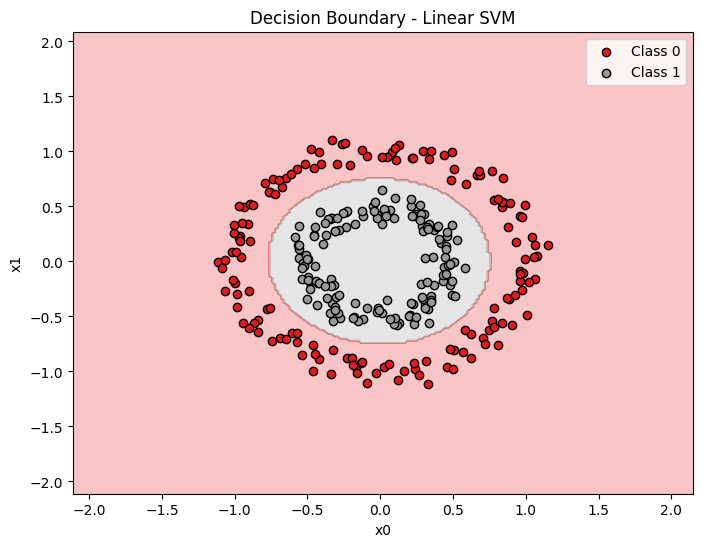

In [23]:
from sklearn.svm import SVC

# Créer et entraîner le SVM avec kernel RBF
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5)  # gamma = 0.5 est un exemple
svm_rbf.fit(X, y)

# Afficher la frontière de décision
plot_decision_boundary(X, y, svm_rbf)


In [14]:
from sklearn.model_selection import train_test_split

# Étape 1 : séparer train (60%) et temp (40% = validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Étape 2 : séparer validation (20%) et test (20%) à partir du temp (qui fait 40%)
# Ici, test_size=0.5 → 50% de 40% = 20% du total
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Vérification des tailles
print("Train samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Test samples:", X_test.shape[0])


Train samples: 180
Validation samples: 60
Test samples: 60


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split 60/20/20
X_train, X_rem, y_train, y_rem = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem
)

# Paramètres à tester
kernels = ['poly', 'rbf', 'sigmoid']
gammas = [0.1, 0.2, 0.5, 0.8, 1]

# Stocker les résultats
results = []

# Boucles imbriquées
for kernel in kernels:
    for gamma in gammas:
        # 1️⃣ Créer le modèle SVM avec les paramètres du moment
        model = SVC(kernel=kernel, gamma=gamma, C=1.0)

        # 2️⃣ Entraîner sur le train set
        model.fit(X_train, y_train)

        # 3️⃣ Prédire sur le validation set
        y_val_pred = model.predict(X_val)

        # 4️⃣ Calculer l'accuracy sur validation
        acc = accuracy_score(y_val, y_val_pred)

        # 5️⃣ Stocker ou afficher le résultat
        results.append((kernel, gamma, acc))
        print(f"Kernel: {kernel}, Gamma: {gamma}, Validation Accuracy: {acc:.4f}")

# Trouver la meilleure combinaison
best = max(results, key=lambda x: x[2])
print("\nBest combination:")
print(f"Kernel: {best[0]}, Gamma: {best[1]}, Validation Accuracy: {best[2]:.4f}")


Kernel: poly, Gamma: 0.1, Validation Accuracy: 0.5500
Kernel: poly, Gamma: 0.2, Validation Accuracy: 0.5500
Kernel: poly, Gamma: 0.5, Validation Accuracy: 0.5667
Kernel: poly, Gamma: 0.8, Validation Accuracy: 0.6000
Kernel: poly, Gamma: 1, Validation Accuracy: 0.6000
Kernel: rbf, Gamma: 0.1, Validation Accuracy: 0.7000
Kernel: rbf, Gamma: 0.2, Validation Accuracy: 1.0000
Kernel: rbf, Gamma: 0.5, Validation Accuracy: 1.0000
Kernel: rbf, Gamma: 0.8, Validation Accuracy: 1.0000
Kernel: rbf, Gamma: 1, Validation Accuracy: 1.0000
Kernel: sigmoid, Gamma: 0.1, Validation Accuracy: 0.4000
Kernel: sigmoid, Gamma: 0.2, Validation Accuracy: 0.4000
Kernel: sigmoid, Gamma: 0.5, Validation Accuracy: 0.3833
Kernel: sigmoid, Gamma: 0.8, Validation Accuracy: 0.4000
Kernel: sigmoid, Gamma: 1, Validation Accuracy: 0.4000

Best combination:
Kernel: rbf, Gamma: 0.2, Validation Accuracy: 1.0000


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Entraîner le SVM avec la meilleure combinaison
final_model = SVC(kernel='rbf', gamma=0.2, C=1.0)
final_model.fit(X_train, y_train)  # ou X_train + X_val si tu veux

# Prédire sur le test set
y_test_pred = final_model.predict(X_test)

# Calculer l'accuracy sur le test set
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 1.0000


In [34]:
data2=read_csv("tree_example1.csv")
print(data2.head)
print(data2.shape)
import numpy as np
print("Classes présentes dans y_train2:", np.unique(y_train2))
print("Classes présentes dans y_test2:", np.unique(y_test2))


<bound method NDFrame.head of            x0        x1  y
0   -2.165956 -1.040609  0
1   -1.559351 -0.024921  0
2   -2.999771  0.479823  0
3   -2.395335  1.315924  0
4   -2.706488 -1.372834  0
..        ...       ... ..
555  2.973501 -1.410176  0
556  3.196929 -1.963932  0
557  3.054535 -1.799818  0
558  3.249643 -1.211699  0
559  3.710083 -1.987903  0

[560 rows x 3 columns]>
(560, 3)
Classes présentes dans y_train2: [0 1 2]
Classes présentes dans y_test2: [0 1 2]


Train accuracy: 1.0
Test accuracy: 1.0


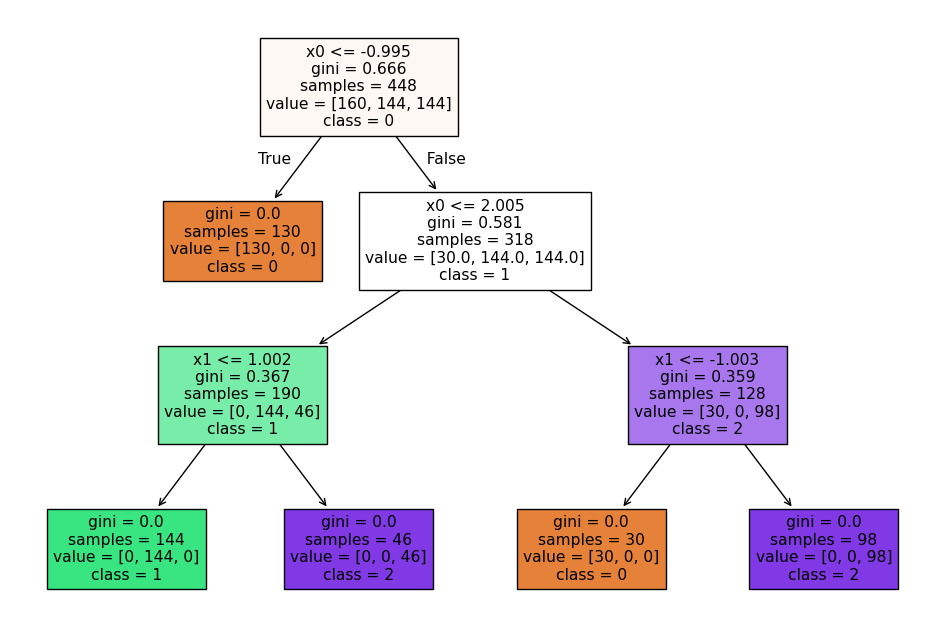

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Séparer features et target
X2 = data2[['x0','x1']].values
y2 = data2['y'].values

# Split train/test
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Créer et entraîner l'arbre
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train2, y_train2)

# Accuracy sur train et test
print("Train accuracy:", accuracy_score(y_train2, tree.predict(X_train2)))
print("Test accuracy:", accuracy_score(y_test2, tree.predict(X_test2)))

# Visualisation de l'arbre
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=['x0','x1'], class_names=['0','1','2'] , filled=True)
plt.show()
